## Data Loading

In [1]:
# Creating connection to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
# Loading the data
flights_df = pd.read_csv('/content/drive/MyDrive/flights_data.csv')

## Data Exploration

In [3]:
# Checking the number of rows and columns
flights_df.shape

(3000000, 32)

In [4]:
# Remove limit on number of columns to display
pd.set_option('display.max_columns', None)

In [5]:
# pre-viewing the dataset
flights_df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0.0,NaN,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0.0,NaN,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0.0,NaN,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0.0,NaN,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,0.0,NaN,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [6]:
# Check the proportion of missing values in the columns
missing_proportion = flights_df.isnull().mean()
missing_proportion[missing_proportion > 0]

DEP_TIME                   0.025872
DEP_DELAY                  0.025881
TAXI_OUT                   0.026269
WHEELS_OFF                 0.026269
WHEELS_ON                  0.026648
TAXI_IN                    0.026648
ARR_TIME                   0.026647
ARR_DELAY                  0.028733
CANCELLATION_CODE          0.973620
CRS_ELAPSED_TIME           0.000005
ELAPSED_TIME               0.028733
AIR_TIME                   0.028733
DELAY_DUE_CARRIER          0.822046
DELAY_DUE_WEATHER          0.822046
DELAY_DUE_NAS              0.822046
DELAY_DUE_SECURITY         0.822046
DELAY_DUE_LATE_AIRCRAFT    0.822046
dtype: float64

In [7]:
# Remove columns with 80% or more missing data
missing_80_percent = missing_proportion[missing_proportion > 0.8]
flights_df = flights_df.drop(columns = missing_80_percent.index)

# View dataframe shape
flights_df.shape

(3000000, 26)

<Axes: >

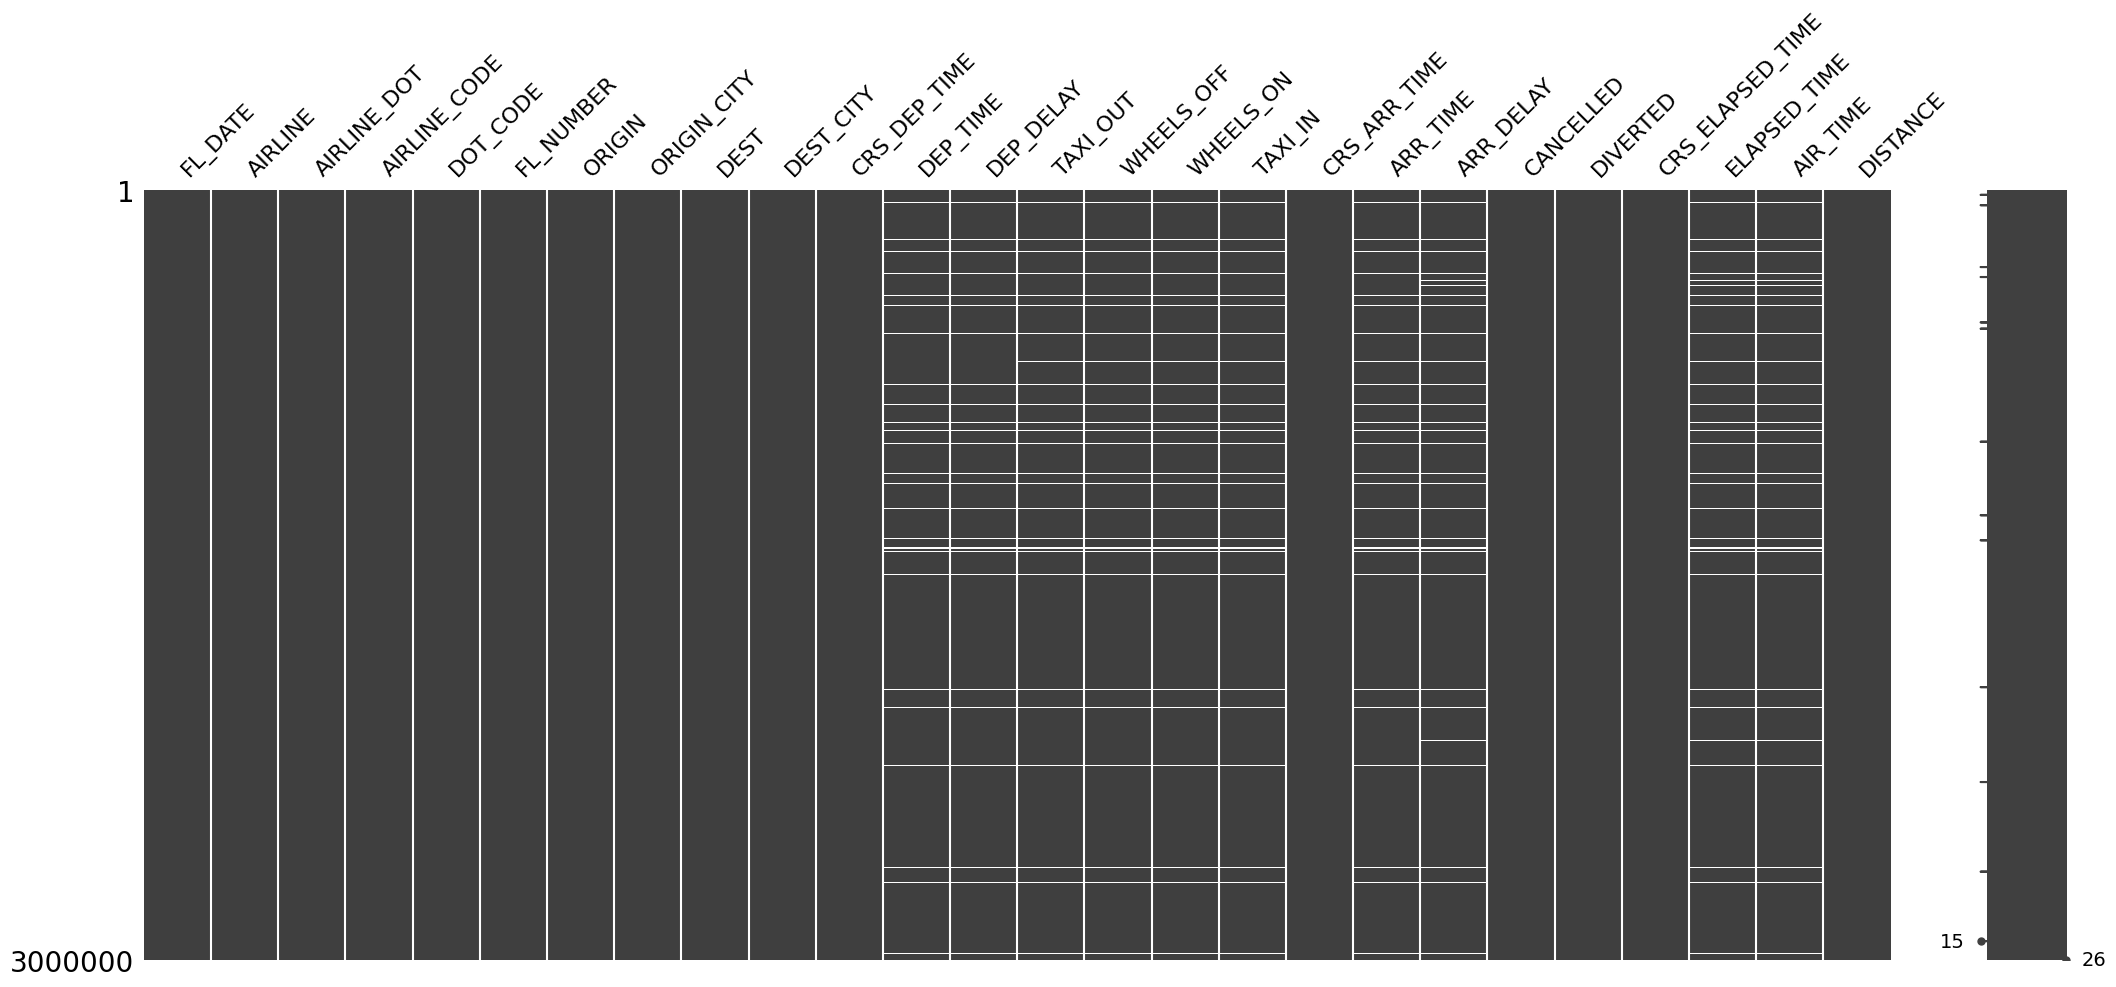

In [8]:
import missingno as msno

# Visualizing the missingness pattern in the data
msno.matrix(flights_df)

In [9]:
#Droping missing values
flights_df = flights_df.dropna()
flights_df.shape

(2913802, 26)

## Data Processing

In [10]:
## EXTRACTING THE HOUR OF THE FLIGHT
# Change datatype to string
flights_df['DEP_TIME'] = flights_df['DEP_TIME'].astype(str)

# Remove the last two charaters
flights_df['DEP_TIME'] = flights_df['DEP_TIME'].str.slice(0, -2)

# Pad 'deptime' with leading zeros to get 4 digits
flights_df['DEP_TIME'] = flights_df['DEP_TIME'].apply(lambda x: '{0:0>4}'.format(x))

# Get the hour of depature
flights_df['DEP_HOUR'] =  flights_df['DEP_TIME'].str[0:2]

# Replace 24 with 00
flights_df['DEP_HOUR'] =  flights_df['DEP_HOUR'].str.replace('24','00')

In [11]:
## CREATING DAY OF WEEK COLUMN
# Convert 'Date' column to datetime format
flights_df['FL_DATE'] = pd.to_datetime(flights_df['FL_DATE'])

# Create a new column 'DayOfWeek' containing the day of the week
flights_df['DAY_OF_WEEK'] = flights_df['FL_DATE'].dt.day_name()


In [12]:
# Splitting the origin city column into 'City' and 'State_Code'
flights_df[['ORIGIN_CITY', 'ORIGIN_STATE_CODE']] = flights_df['ORIGIN_CITY'].str.split(', ', expand=True)
# Splitting the destination city column into 'City' and 'state_Code'
flights_df[['DEST_CITY', 'DEST_STATE_CODE']] = flights_df['DEST_CITY'].str.split(', ', expand=True)

In [13]:
flights_df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DEP_HOUR,DAY_OF_WEEK,ORIGIN_STATE_CODE,DEST_STATE_CODE
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,Fort Lauderdale,EWR,Newark,1155,1151,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0.0,0.0,186.0,176.0,153.0,1065.0,11,Wednesday,FL,NJ
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,Minneapolis,SEA,Seattle,2120,2114,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0.0,0.0,235.0,236.0,189.0,1399.0,21,Saturday,MN,WA
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,Denver,MSP,Minneapolis,954,1000,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0.0,0.0,118.0,112.0,87.0,680.0,10,Friday,CO,MN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,Minneapolis,SFO,San Francisco,1609,1608,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0.0,0.0,260.0,285.0,249.0,1589.0,16,Monday,MN,CA
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,Orlando,DFW,Dallas/Fort Worth,1840,1838,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,0.0,0.0,181.0,182.0,153.0,985.0,18,Sunday,FL,TX


## Analysis
**Customer-centric Analysis:**
This looks at metrics that a customer might consider which could influence trip decisions, such as:
* Airline Delay: This could help customers identify airlines that experience frequent delays.
* Time Analysis: This could help customers decide on the best time to fly.
* Airport Traffic: This could help customers identify periods when the airport might be congested.

**Business Focused Analysis:**
This will focus on metrics that a business owner in the aviation industry might consider which could facilitate optimization of business processes:
* Flight Delay: This could draw attention to areas that experience frequent flight delays (Flight, Airline, Location).
* Geographical Analysis: This could help business owners understand popular destinations and flight routes, for investment in the aviation industry.
* Airport Traffic: This could help business owners identify peak travel times to aid efficient scheduling.



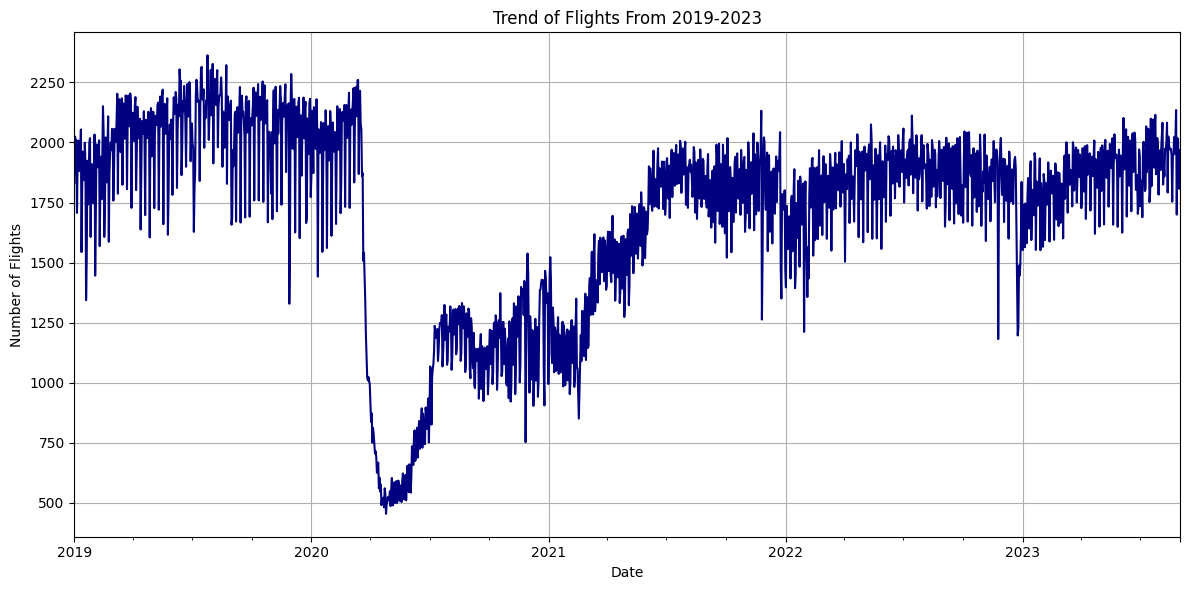

In [41]:
# Plot trend of flights
# Group flights by date and count number of flights for each date
flight_count_per_date = flights_df.groupby('FL_DATE').size()

# Plotting the trend of flights across dates
plt.figure(figsize=(12, 6))
flight_count_per_date.plot(kind='line', color='navy')

plt.title('Trend of Flights From 2019-2023')
plt.xlabel('Date')
plt.ylabel('Number of Flights')
plt.grid(True)
plt.tight_layout()
plt.show()

There is a dip in the number of flights between 2020 and 2021, this is likely as a result of the COVID-19 pandemic.

In [14]:
# Number of flights by airline
flights_df.groupby('AIRLINE').size()

AIRLINE
Alaska Airlines Inc.                   98294
Allegiant Air                          50179
American Airlines Inc.                371218
Delta Air Lines Inc.                  388475
Endeavor Air Inc.                     109848
Envoy Air                             117312
ExpressJet Airlines LLC d/b/a aha!     17951
Frontier Airlines Inc.                 62711
Hawaiian Airlines Inc.                 31698
Horizon Air                            20237
JetBlue Airways                       109447
Mesa Airlines Inc.                     62477
PSA Airlines Inc.                     103483
Republic Airline                      138147
SkyWest Airlines Inc.                 334986
Southwest Airlines Co.                555869
Spirit Air Lines                       93200
United Air Lines Inc.                 248270
dtype: int64

In [15]:
# Group by airline and calculate average delay
average_delay_by_airline = flights_df.groupby('AIRLINE')[['DEP_DELAY', 'ARR_DELAY']].mean()
print(average_delay_by_airline)

                                    DEP_DELAY  ARR_DELAY
AIRLINE                                                 
Alaska Airlines Inc.                 4.554195   1.097900
Allegiant Air                       13.829391  13.284601
American Airlines Inc.              12.533756   6.661229
Delta Air Lines Inc.                 8.018225   1.085079
Endeavor Air Inc.                    5.899006  -1.258539
Envoy Air                            6.635340   3.278914
ExpressJet Airlines LLC d/b/a aha!  12.679182  10.031976
Frontier Airlines Inc.              15.949929  11.100429
Hawaiian Airlines Inc.               5.075557   3.894757
Horizon Air                          4.793645   2.376242
JetBlue Airways                     18.132905  12.276125
Mesa Airlines Inc.                  12.152616   7.309810
PSA Airlines Inc.                    7.884619   3.928655
Republic Airline                     5.680594   0.590176
SkyWest Airlines Inc.                9.401542   4.023311
Southwest Airlines Co.         

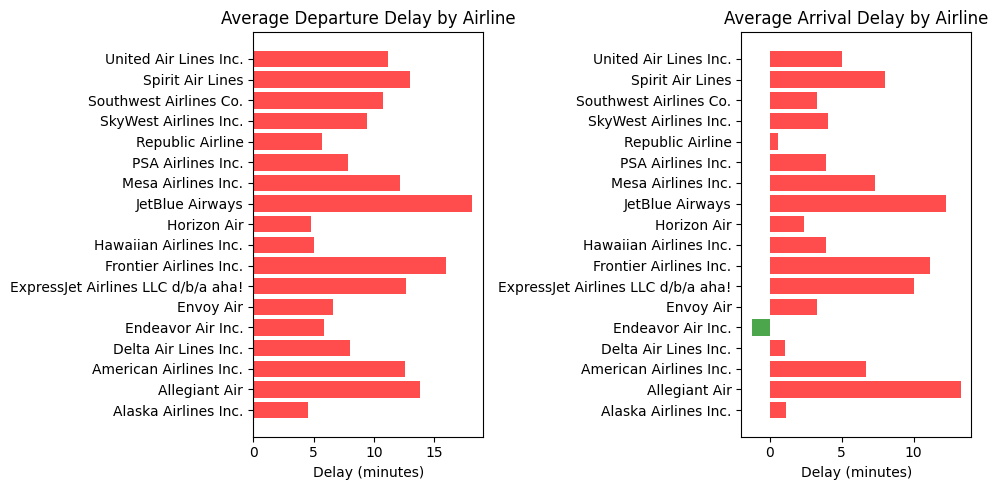

In [16]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Create a horizontal bar plot for departure delays
axs[0].barh(average_delay_by_airline.index, average_delay_by_airline['DEP_DELAY'],
       color=['green' if x < 0 else 'red' for x in average_delay_by_airline['DEP_DELAY']],
       alpha=0.7)
axs[0].set_title('Average Departure Delay by Airline')
axs[0].set_xlabel('Delay (minutes)')

# Create a horizontal bar plot for arrival delays
axs[1].barh(average_delay_by_airline.index, average_delay_by_airline['ARR_DELAY'],
       color=['green' if x < 0 else 'red' for x in average_delay_by_airline['ARR_DELAY']],
       alpha=0.7)
axs[1].set_title('Average Arrival Delay by Airline')
axs[1].set_xlabel('Delay (minutes)')

# Show the plot
plt.tight_layout()
plt.show()

From the charts above we see that the only Airline which Arrives early on average is Endeavor Air Inc. We also see that the Airlines with the highest average arrival and depature delay times are JetBlue Airways, Frontier Airlines Inc, and Allegiant Air.

**Recommendation:** From the perspective of the customers, if punctuality is important for the trip, it would be safer to travel with Endeavor Air Inc.
From the perspective of the Airline owners, it would be worthwhile to explore the causes of delays in JetBlue Airways, Frontier Airlines Inc, and Allegiant Air to discover a possible solution.



In [43]:
# Top 10 most delayed flights
most_delayed_flights = flights_df[['FL_DATE', 'ORIGIN_CITY','DEST_CITY', 'AIRLINE', 'DEP_DELAY']].sort_values(by='DEP_DELAY', ascending=False)
most_delayed_flights['DELAY_HRS'] = round(most_delayed_flights['DEP_DELAY'] / 60, 0)
most_delayed_flights.head(10)

,FL_DATE,ORIGIN_CITY,DEST_CITY,AIRLINE,DEP_DELAY,DELAY_HRS
2639771,2022-03-26,Des Moines,Charlotte,American Airlines Inc.,2966.0,49.0
2210421,2023-08-25,Valparaiso,Dallas/Fort Worth,American Airlines Inc.,2938.0,49.0
2606159,2023-07-11,Tampa,Philadelphia,American Airlines Inc.,2905.0,48.0
2026734,2022-11-10,St. Louis,Chicago,American Airlines Inc.,2903.0,48.0
2097337,2023-05-28,Bakersfield,Phoenix,American Airlines Inc.,2895.0,48.0
1899200,2023-05-31,Memphis,Charlotte,American Airlines Inc.,2884.0,48.0
518982,2023-08-17,Madison,Dallas/Fort Worth,American Airlines Inc.,2690.0,45.0
1976065,2020-03-13,Charlotte,New York,Endeavor Air Inc.,2579.0,43.0
1383097,2021-11-11,Nashville,Miami,American Airlines Inc.,2574.0,43.0
497414,2021-02-20,Houston,Charlotte,American Airlines Inc.,2565.0,43.0


Majority of the most delayed flights are from American Airlines Inc, having delay time over 40 hours.

**Recommendation:** The Airline should consider investigating the cause of these delays.

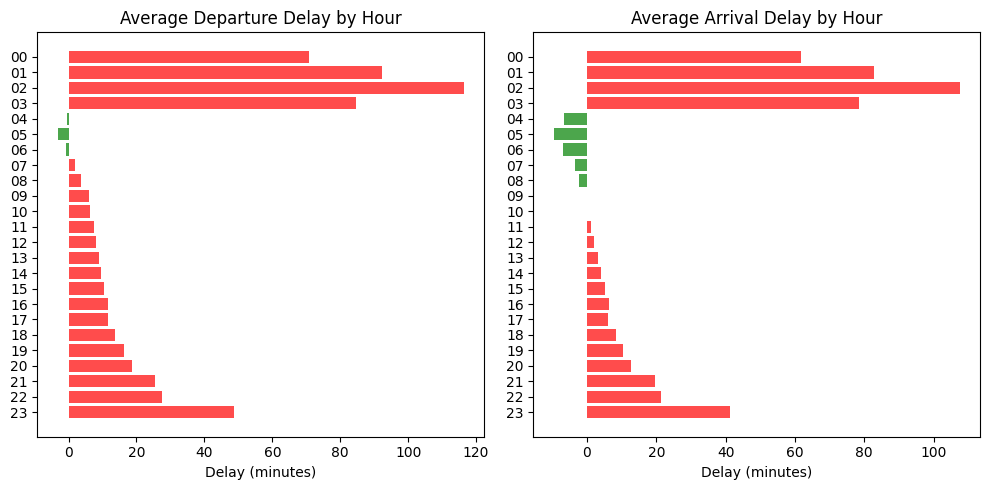

In [17]:
import matplotlib.pyplot as plt
# Group by airline and calculate average delay
average_delay_by_hour = flights_df.groupby('DEP_HOUR')[['DEP_DELAY', 'ARR_DELAY']].mean()

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Create a horizontal bar plot for departure delays
axs[0].barh(average_delay_by_hour.index, average_delay_by_hour['DEP_DELAY'],
       color=['green' if x < 0 else 'red' for x in average_delay_by_hour['DEP_DELAY']],
       alpha=0.7)
axs[0].invert_yaxis()
axs[0].set_title('Average Departure Delay by Hour')
axs[0].set_xlabel('Delay (minutes)')

# Create a horizontal bar plot for arrival delays
axs[1].barh(average_delay_by_hour.index, average_delay_by_hour['ARR_DELAY'],
       color=['green' if x < 0 else 'red' for x in average_delay_by_hour['ARR_DELAY']],
       alpha=0.7)
axs[1].invert_yaxis()
axs[1].set_title('Average Arrival Delay by Hour')
axs[1].set_xlabel('Delay (minutes)')

# Show the plot
plt.tight_layout()
plt.show()

From the charts above we see that flights generally experience less delay between 4 am and 8 am. Flights that depart between these times arrive early on average. Late night/early morning flights, between 11 pm and 3 am experience more frequent delays. On average, these flights experience departure delays of 30 minutes or more.

**Recommendation:** Customers can use this information to estimate potential delays based on the flight time to enable them to plan their trip accordingly. Airports might consider looking into the reason behind late departures for night flights.


In [18]:
# Groupby day of week and departure hour
flight_counts = flights_df.groupby(['DAY_OF_WEEK', 'DEP_HOUR']).size().reset_index(name = 'COUNTS')

# Pivot the DataFrame
flight_counts_pivot = flight_counts.pivot(index='DEP_HOUR', columns='DAY_OF_WEEK', values='COUNTS')

# Define the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the columns to set the correct order for day of week
flight_counts_pivot = flight_counts_pivot.reindex(day_order, axis=1)

# Display table
print(flight_counts_pivot)

DAY_OF_WEEK  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
DEP_HOUR                                                                   
00             1879     1433       1555      1970    1938      1529    2036
01              700      505        532       702     688       613     696
02              238      195        175       210     221       201     235
03              108      101         96       125     115        95     107
04             1002      910        914      1040     933       897     806
05            16320    16014      15842     16455   16124     13795   13494
06            27791    26341      26308     27907   27922     24906   25554
07            26337    24743      24745     26074   25857     23976   25031
08            27687    26492      26946     27743   27592     25852   26548
09            24816    23618      23659     24959   25031     22095   24356
10            27012    25909      25980     27135   26783     24255   26140
11          

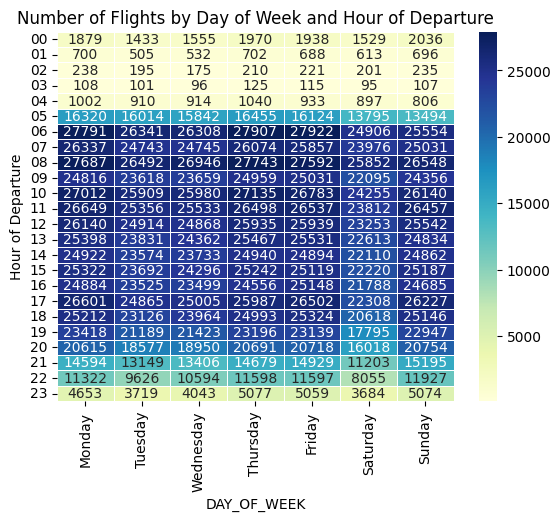

In [19]:
import seaborn as sns
# Create the heatmap
sns.heatmap(flight_counts_pivot, annot=True, fmt="d", cmap='YlGnBu', linewidths=0.5)

# Add title and axis labels
plt.title('Number of Flights by Day of Week and Hour of Departure')
plt.ylabel('Hour of Departure')

# Show the plot
plt.show()

From the Heatmap we see that there are more flights During the day between 6 am and 8 pm. The most popular times to fly are 6 am, 8 am, and 10 am.

**Recommendation:** If a customer is trying to avoid congestion at the airport, they should consider booking early morning/late night flights.
Airports should consider scheduling more staff during the day between 6 am and 8 pm and less staff between 9 pm and 5 am to maximize productivity.


In [21]:
# Get Top 10 Most Popular Destinations
states = flights_df.groupby('DEST_STATE_CODE').size().reset_index(name='no_of_flights')
states.sort_values(by='no_of_flights', ascending=False).head(10)

,DEST_STATE_CODE,no_of_flights
45,TX,314096
4,CA,308750
9,FL,252412
10,GA,161862
14,IL,159306
34,NY,139578
27,NC,131279
5,CO,130611
3,AZ,86090
50,WA,81931


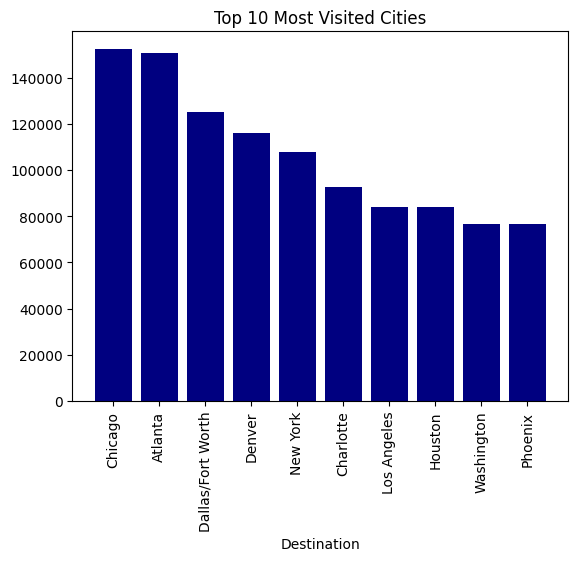

In [22]:
# Group by origin and destination and count the number of flights
flight_counts = flights_df.groupby('DEST_CITY').size().reset_index(name='FlightCount')

# Sort the DataFrame by flight count in descending order
flight_counts = flight_counts.sort_values('FlightCount', ascending=False).head(10)

# Create a horizontal bar plot
plt.bar(flight_counts['DEST_CITY'], flight_counts['FlightCount'], color='navy')

# Add labels and title
plt.xlabel('Destination')
plt.xticks(rotation=90)
plt.title('Top 10 Most Visited Cities')

# Show the plot
plt.show()

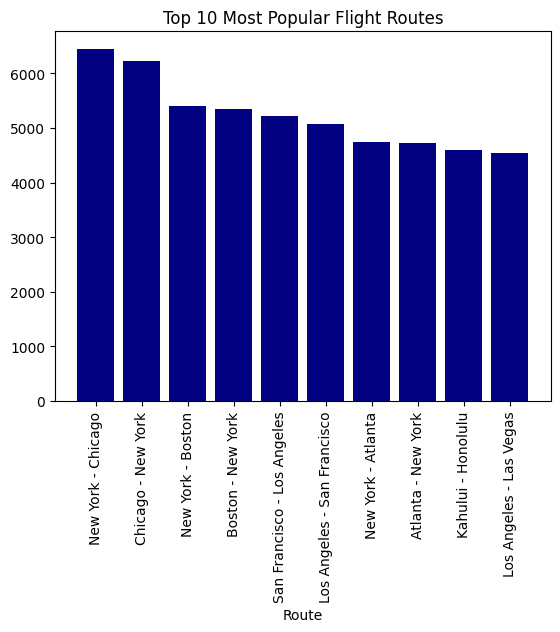

In [23]:
# Group by origin and destination and count the number of flights
flight_counts = flights_df.groupby(['ORIGIN_CITY', 'DEST_CITY']).size()

# Convert the Series to a DataFrame and reset the index
flight_counts = flight_counts.to_frame('FlightCount').reset_index()

# Create a new column that combines the origin and destination state names
flight_counts['Route'] = flight_counts['ORIGIN_CITY'] + ' - ' + flight_counts['DEST_CITY']

# Sort the DataFrame by flight count in descending order
flight_counts = flight_counts.sort_values('FlightCount', ascending=False).head(10)

# Create a horizontal bar plot
plt.bar(flight_counts['Route'], flight_counts['FlightCount'], color='navy')

# Add labels and title

plt.xlabel('Route')
plt.xticks(rotation=90)
plt.title('Top 10 Most Popular Flight Routes')

# Show the plot
plt.show()

In [24]:
# Getting geographical data
import geopandas as gpd

shape = gpd.read_file('/content/drive/MyDrive/Shape_file/cb_2018_us_state_500k.shp')
shape.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [26]:
# Merging geographical data with flights data
shape = pd.merge(left=shape, right=states, left_on='STUSPS', right_on='DEST_STATE_CODE', how='left')

In [27]:
shape = shape.dropna()

In [28]:
# Remve 'Alaska', 'Hawaii', 'Puerto Rico'
shape = shape [~shape ['STUSPS'].isin (['AK', 'HI', 'PR', 'VI'])]

<ipython-input-29-00ead91ebba0>:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(shape.centroid.x, shape.centroid.y, shape.STUSPS):


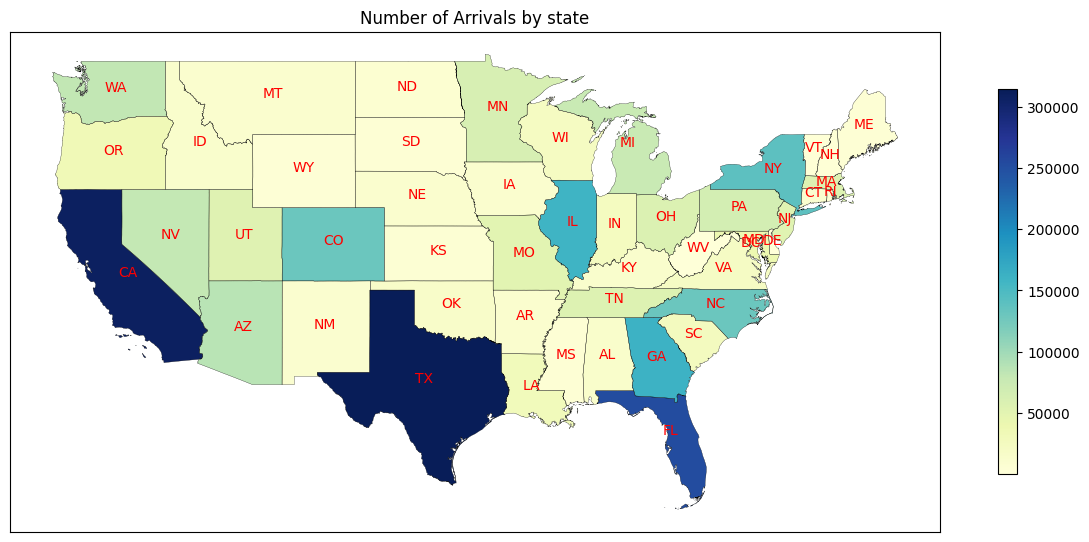

In [29]:
# Cloropleth map for number of visits per state
ax = shape.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(15, 10))
shape.plot(ax=ax, column='no_of_flights', legend=True, cmap='YlGnBu', legend_kwds={'shrink':0.5})
# Remove axis Labels
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# Add state names
for x, y, label in zip(shape.centroid.x, shape.centroid.y, shape.STUSPS):
    ax.text(x, y, label, ha='center',color='Red')
ax.set_title('Number of Arrivals by state')
plt.show()

The charts above show that Texas(TX) and California(CA)) are the most popular destinations, having over 300,000 visits. The most popular flight route is from New York to Chicago and Chicago to New York, both over 60,000 flights.

**Recommendation:** Investing in New York's aviation industry appears promising due to its significant volume of inbound and outbound flights. The substantial demand for aviation facilities and resources in the area makes it an attractive investment opportunity.


In [30]:
import numpy as np

# Group by airline and calculate average delay
average_delay_by_state = flights_df.groupby('DEST_STATE_CODE')['DEP_DELAY'].agg([np.mean, np.size]).reset_index()

In [31]:
average_delay_by_state.sort_values(by='mean', ascending=False).round(0).head()

,DEST_STATE_CODE,mean,size
8,DE,18.0,13
39,PR,18.0,13878
31,NJ,15.0,52815
19,MA,13.0,55382
34,NY,13.0,139578


In [32]:
# Top 5 states with least delay
average_delay_by_state.sort_values(by='mean', ascending=True).head()

,DEST_STATE_CODE,mean,size
44,TT,-0.885185,540
0,AK,2.907364,17315
11,HI,5.801463,50298
50,WA,6.186498,81931
37,OR,7.241073,34305


In [34]:
shape = pd.merge(left=shape, right=average_delay_by_state, left_on='STUSPS', right_on='DEST_STATE_CODE', how='left')

<ipython-input-52-dd81a5194bb1>:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(shape.centroid.x, shape.centroid.y, shape.STUSPS):


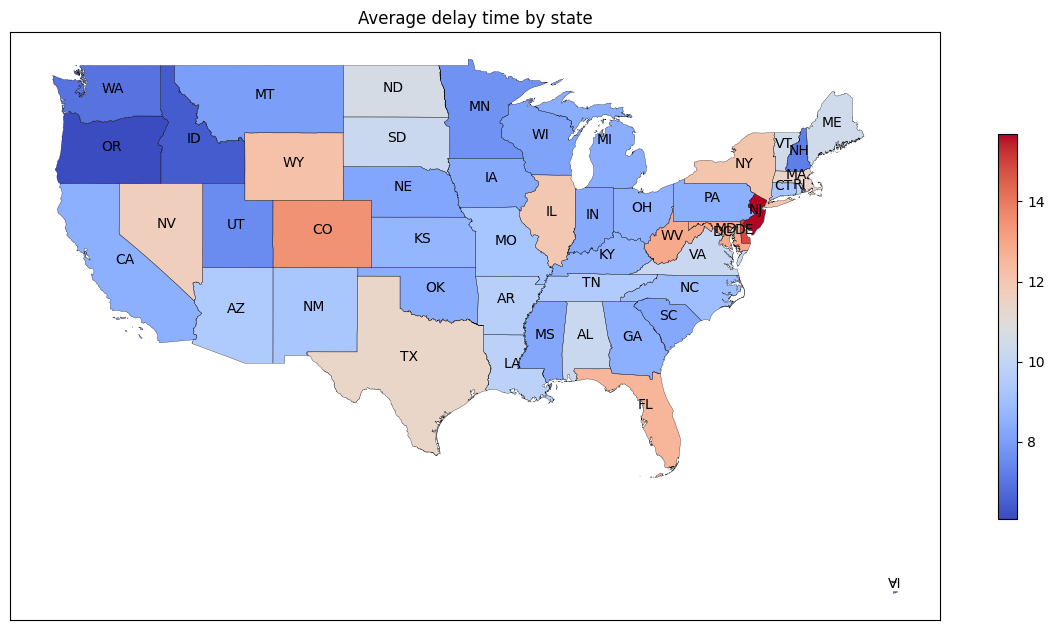

In [ ]:
#Cloropleth map for average delay per state
ax = shape.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(15, 10))
shape.plot(ax=ax, column='mean', legend=True, cmap='coolwarm', legend_kwds={'shrink':0.5})
# Remove axis Labels
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# Add state names
for x, y, label in zip(shape.centroid.x, shape.centroid.y, shape.STUSPS):
    ax.text(x, y, label, ha='center',color='Black')
ax.set_title('Average delay time (minutes) by state')
plt.show()

From the chart above we see that some states highlighted in red have an average delay time greater than 11 minutes. New Jersey has the highest average delay time of 16 minutes.  

**Recommendation:** Airline owners and Airports in these red states should consider looking into the root cause of the delays.

## Conclusion
The information derived from this analysis could help customers make more informed decisions when planning trips. This analysis also alerts business owners in the aviation industry to problem areas that might need more attention, to improve business processes.

## Recommendation
The majority of the data concerning flight cancellations, diversions, and reason delays were missing from the data. We should consider setting up more efficient data collection procedures for these metrics to improve future analyses. This will provide more information about the root cause of some flight issues.